# 使用numpy和pandas操作股票数据

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from random import randint
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('510300.csv').iloc[::-1]
df.index = df.index[::-1]
df['日期'] = pd.to_datetime(df['日期'],format="%Y年%m月%d日")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      1715 non-null   datetime64[ns]
 1   收盘      1715 non-null   float64       
 2   开盘      1715 non-null   float64       
 3   高       1715 non-null   float64       
 4   低       1715 non-null   float64       
 5   交易量     1715 non-null   object        
 6   涨跌幅     1715 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 93.9+ KB


,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2015-02-10,3.40,3.34,3.40,3.33,1.39B,2.01%
1,2015-02-11,3.42,3.40,3.43,3.40,1.19B,0.65%
2,2015-02-12,3.43,3.42,3.45,3.39,778.51M,0.41%
3,2015-02-13,3.46,3.44,3.50,3.44,1.08B,0.64%
4,2015-02-16,3.49,3.46,3.49,3.45,842.16M,0.84%
...,...,...,...,...,...,...,...
1710,2022-02-24,4.53,4.59,4.60,4.49,591.24M,-1.84%
1711,2022-02-25,4.57,4.55,4.61,4.55,384.47M,0.77%
1712,2022-02-28,4.57,4.56,4.57,4.52,269.32M,0.13%
1713,2022-03-01,4.61,4.59,4.62,4.57,326.16M,0.83%


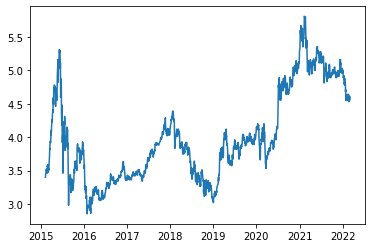

In [6]:
plt.plot(df["日期"], df["收盘"])

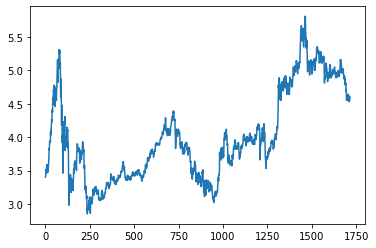

In [13]:
plt.plot(df.index, df["收盘"])

# 定投模型


In [19]:
# 选取定投范围
dateStart = 1000
dateEnd = 1250

从2019-03-22 00:00:00至2020-03-25 00:00:00，现价：3.71，共定投50次
本金：50000
份额：12834.942772714978
市值：47617.63768677257
定投收益率：-4.764724626454864%
梭哈收益率：95.822454308094%


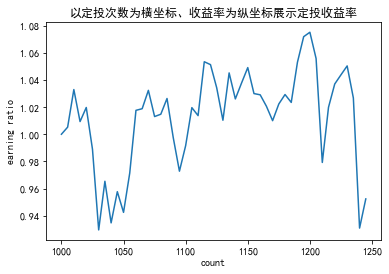

In [20]:
# 默认每周定投一次
def AutomaticInvestmentPlanWithFixedInterval(dateStart,dateEnd,capital=1000,interval=5):
    totalCapital = 0 #总成本
    share = 0.0 # 份额
    chooce = [] #定投位置
    ratioList = []
    for now in range(dateStart,dateEnd,interval):
        chooce.append(now)
        totalCapital += capital
        share += capital/df.iloc[now]["收盘"]
        nowCaptital = share*df.iloc[now]["收盘"]
        earningRatio = nowCaptital/totalCapital
        
        ratioList.append(earningRatio)
    print(f'从{df.iloc[dateStart]["日期"]}至{df.iloc[now]["日期"]}，现价：{df.iloc[now]["收盘"]}，共定投{len(chooce)}次')
    print(f'本金：{totalCapital}')
    print(f'份额：{share}')
    print(f'市值：{nowCaptital}')
    print(f'定投收益率：{earningRatio*100-100}%')
    print(f'梭哈收益率：{df.iloc[dateEnd]["收盘"]/df.iloc[dateStart]["收盘"]*100}%')
    
#     plt.plot(chooce,list(map(lambda x:x**2,ratioList)))
#     plt.plot(df.iloc[dateStart:dateEnd].index,df.iloc[dateStart:dateEnd]['收盘'])
#     c = np.random.rand(len(chooce))
#     plt.scatter(chooce,list(map(lambda x:df.iloc[x]["收盘"],chooce)),c=c)
#     plt.show()
    # 解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.title("以定投次数为横坐标、收益率为纵坐标展示定投收益率")
    plt.ylabel("earning ratio")
    plt.xlabel("count")
    plt.plot(chooce, ratioList)
AutomaticInvestmentPlanWithFixedInterval(dateStart,dateEnd)

# 网格模型

比较两套计算方案收益率
1. 固定基准价：
基准价固定，每次计算（基准价-现价）/基准价，如果达到条件则自动下单
2. 变动基准价：
基准价根据每次买入后的成本价格计算。
比如初始价格为10，下跌10%到9，此时买入相同份额后计算成本价：
假设成本价为9.5，按此价格再下跌10%，要比固定基准价购买时机更晚。

In [21]:
# 固定成本
def Grid(dateStart,dateEnd):
    capital = 100000
    oneHand = 100
    upRatio = 0.05
    downRatio = 0.05
    
    share = 0.0 # 份额
    buyOn = [] # 买入位置
    sellOn = [] # 卖出位置
    ratioList = [] # 盈利率
    basePrice = df.iloc[dateStart]["收盘"] # 确定初始基准价
    
    for now in range(dateStart,dateEnd):# 遍历每个时间点
        nowPrice = df.iloc[now]["收盘"]
        if nowPrice>basePrice and (nowPrice-basePrice)/basePrice>=upRatio and share>=oneHand:
            share -= oneHand
            capital += oneHand*nowPrice
            upRatio += 0.05
            downRatio = 0.05  #重置下跌时买入状态
            buyOn.append(now)
        elif nowPrice<basePrice and (basePrice-nowPrice)/basePrice>=downRatio:
            share += oneHand
            capital -= oneHand*nowPrice
            downRatio += 0.05
            upRatio = 0.05  #重置上涨时买入状态
            sellOn.append(now)
    print(f'市值：{capital+share*df.iloc[dateEnd]["收盘"]}')
    print(f'盈利率：{(capital+share*df.iloc[dateEnd]["收盘"]-100000)/1000}%')
Grid(dateStart,dateEnd)

市值：100047.0
盈利率：0.047%
